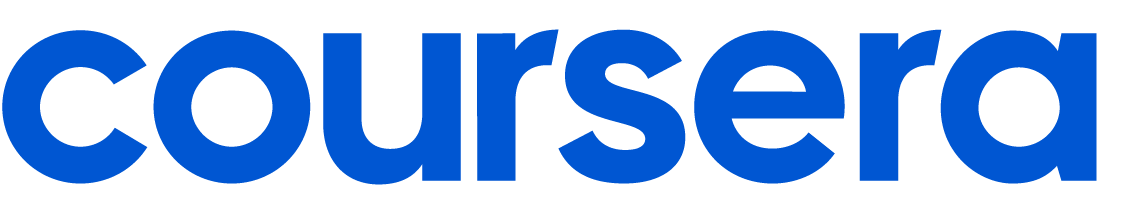

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
pip install --upgrade seaborn

     |████████████████████████████████| 293 kB 43.1 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import any other packages you may want to use
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
import matplotlib.pyplot as plt

## Data Cleaning

## 1. Loading Data:

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

## 2. Checking for Missing Values:

#### Checked for missing values in both training and test datasets.

In [34]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth   

#### Finding: There were no missing values in either dataset.

## Data Exploration

In [8]:
#Summary Statistics:
train_df[['TotalCharges', 'ViewingHoursPerWeek', 'ContentDownloadsPerMonth']].describe()


,TotalCharges,ViewingHoursPerWeek,ContentDownloadsPerMonth
count,243787.000000,243787.000000,243787.000000
mean,750.741017,20.502179,24.503513
std,523.073273,11.243753,14.421174
min,4.991154,1.000065,0.000000
25%,329.147027,10.763953,12.000000
50%,649.878487,20.523116,24.000000
75%,1089.317362,30.219396,37.000000
max,2378.723844,39.999723,49.000000


#### Distribution of Total Charges:

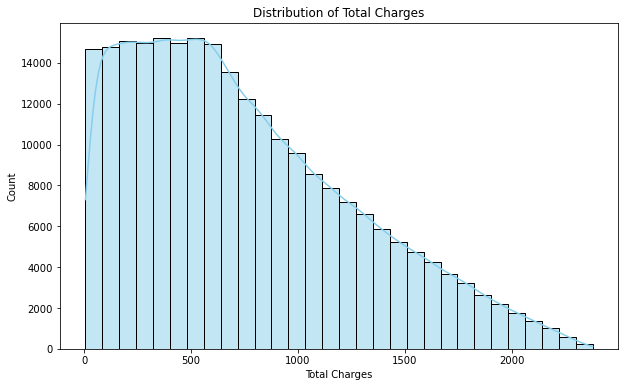

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['TotalCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

#### Insight: The majority of subscriptions have TotalCharges between $0 to $500. There are fewer subscriptions as the charges increase beyond $500.

#### Correlation Matrix

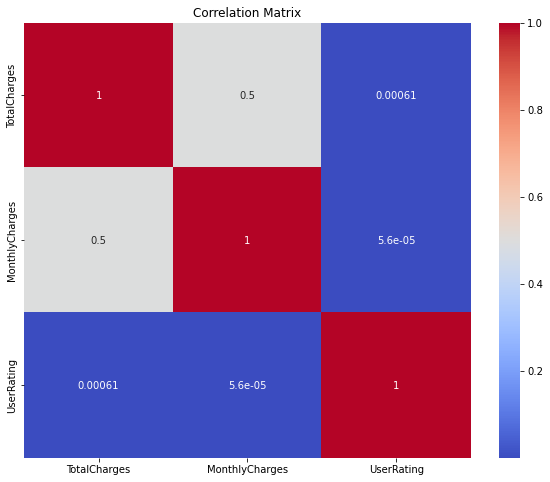

In [10]:
#Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[['TotalCharges', 'MonthlyCharges', 'UserRating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Distribution of Subcription Types

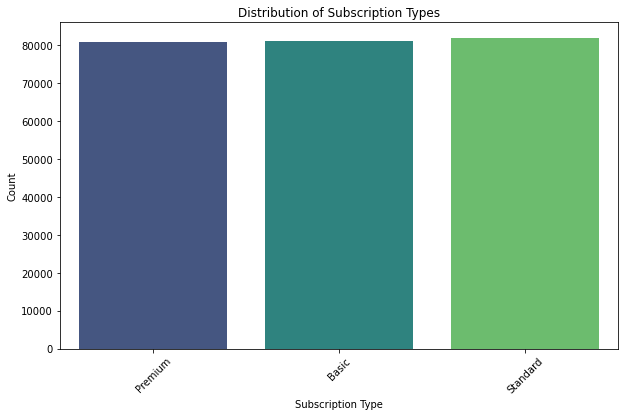

In [11]:
#Categorical Variables Exploration
plt.figure(figsize=(10, 6))
sns.countplot(x='SubscriptionType', data=train_df, palette='viridis')
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Insight: The counts for Basic, Premium, and Standard subscription types are fairly balanced, with slight variations.


#### Subcription Types vs Genre Preference

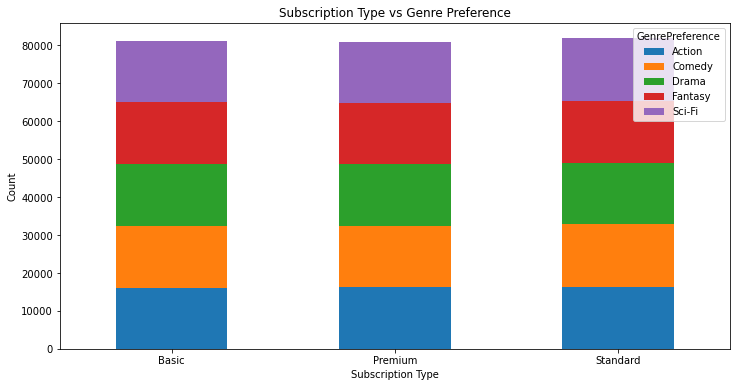

In [12]:
#Cross-tabulations
subscription_genre = pd.crosstab(train_df['SubscriptionType'], train_df['GenrePreference'])
subscription_genre.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Subscription Type vs Genre Preference')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### Insight: Different subscription types have varying preferences for genres, with Comedy and Sci-Fi being popular across all types.


#### Churn Analysis

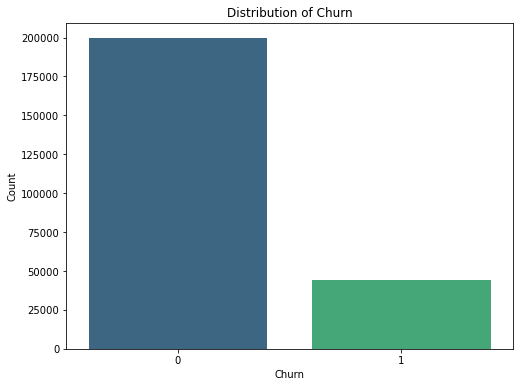

In [13]:
#Relationship Between Features and Target (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=train_df, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


#### Insight: A significant portion of the subscriptions did not churn, indicating a higher retention rate.

#### Monthly Charges and Churn:

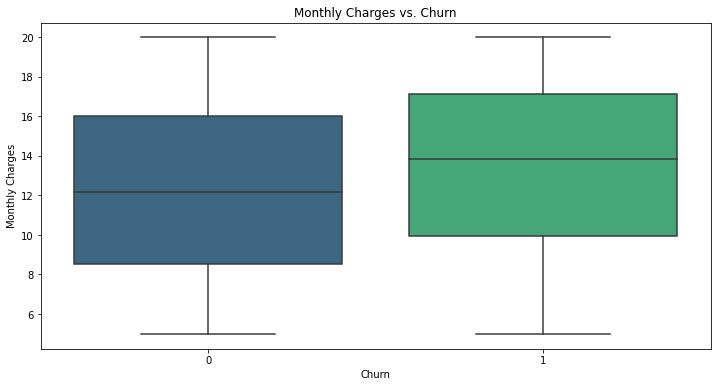

In [14]:
#Feature vs. Target Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df, palette='viridis')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


#### Monthly Charges Trend Over Account Age

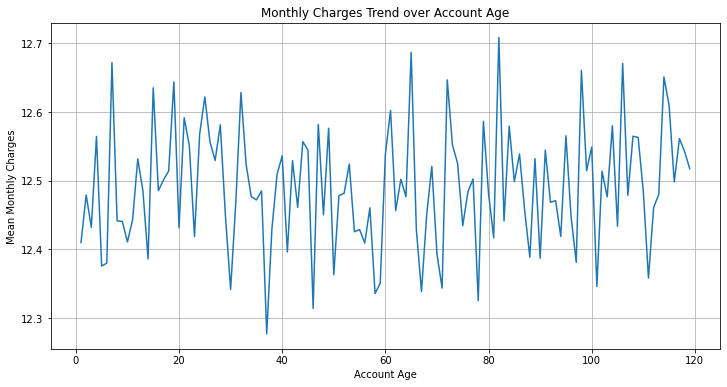

In [15]:
#Time Series Analysis 
monthly_charges_trend = train_df.groupby('AccountAge')['MonthlyCharges'].mean()
monthly_charges_trend.plot(figsize=(12, 6))
plt.title('Monthly Charges Trend over Account Age')
plt.xlabel('Account Age')
plt.ylabel('Mean Monthly Charges')
plt.grid(True)
plt.show()


#### Total Charges by Subcribtion Type

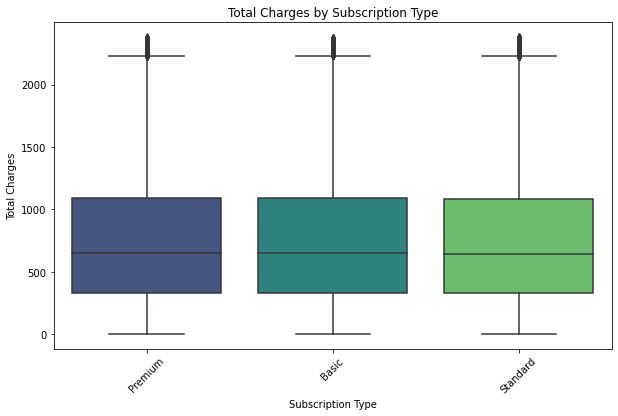

In [16]:
#Outliers and Anomalies Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='SubscriptionType', y='TotalCharges', data=train_df, palette='viridis')
plt.title('Total Charges by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.show()


#### Mean Monthly Charges by Subscribtion Type

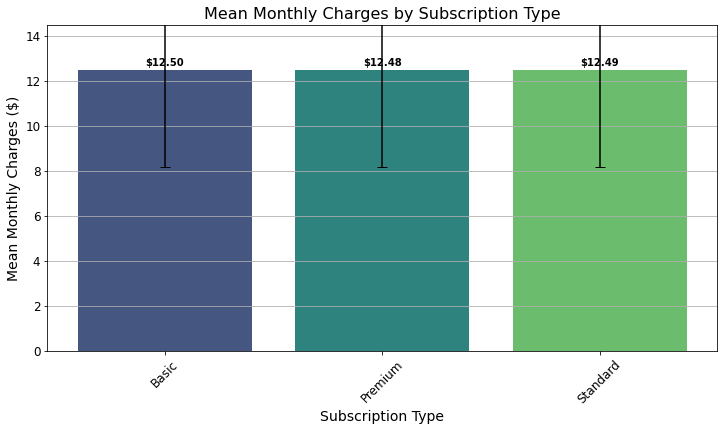

In [17]:

train_df['MonthlyCharges'] = train_df['MonthlyCharges'].astype(float)

# Group by subscription type and calculate mean and standard deviation of monthly charges
summary_df = train_df.groupby('SubscriptionType')['MonthlyCharges'].agg(['mean', 'std']).reset_index()

# Bar chart to visualize mean monthly charges by subscription type with error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='SubscriptionType', y='mean', data=summary_df, palette='viridis', ci=None)

# Add error bars
plt.errorbar(x=summary_df['SubscriptionType'], y=summary_df['mean'], yerr=summary_df['std'], fmt='none', c='black', capsize=5)

# Add text labels on top of the bars
for index, row in summary_df.iterrows():
    plt.text(x=index, y=row['mean'] + 0.2, s=f"${row['mean']:.2f}", 
             ha='center', size='medium', color='black', weight='semibold')

plt.title('Mean Monthly Charges by Subscription Type', fontsize=16)
plt.xlabel('Subscription Type', fontsize=14)
plt.ylabel('Mean Monthly Charges ($)', fontsize=14)
plt.ylim(0, summary_df['mean'].max() + 2)  # Adjust y-axis limit for better spacing
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.show()

#### Mean User Rating by Genre

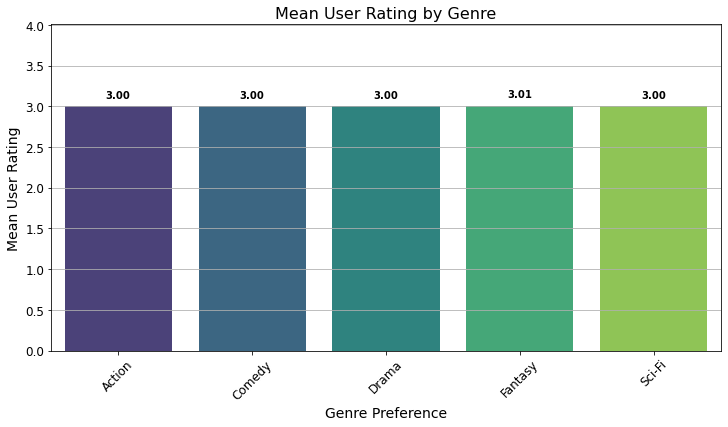

In [18]:

# Group by genre and calculate mean user rating
genre_rating_df = train_df.groupby('GenrePreference')['UserRating'].mean().reset_index()

# Bar chart to visualize mean user rating by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='GenrePreference', y='UserRating', data=genre_rating_df, palette='viridis')

# Add text labels on top of the bars
for index, row in genre_rating_df.iterrows():
    plt.text(x=index, y=row['UserRating'] + 0.1, s=f"{row['UserRating']:.2f}", 
             ha='center', size='medium', color='black', weight='semibold')

plt.title('Mean User Rating by Genre', fontsize=16)
plt.xlabel('Genre Preference', fontsize=14)
plt.ylabel('Mean User Rating', fontsize=14)
plt.ylim(0, genre_rating_df['UserRating'].max() + 1)  # Adjust y-axis limit for better spacing
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.show()


### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

## Feature Engineering

In [19]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [22]:
#List of categorical columns
cat_cols = ['SubscriptionType','PaymentMethod','PaperlessBilling','ContentType','MultiDeviceAccess','DeviceRegistered','GenrePreference', 'Gender', 'ParentalControl','SubtitlesEnabled']

# One-hot encode categorical columns using get_dummies
encoded_cols_train = pd.get_dummies(train_df[cat_cols])


# Concatenate encoded columns with original features dataframe
features_one_hot_train = pd.concat([train_df, encoded_cols_train], axis=1)

# Drop the original categorical columns as they are now one-hot encoded
features_one_hot_train.drop(columns=cat_cols, inplace=True)

# Display the resulting dataframe
print(features_one_hot_train.head())



   AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  \
0          20       11.055215    221.104302            36.758104   
1          57        5.175208    294.986882            32.450568   
2          73       12.106657    883.785952             7.395160   
3          32        7.263743    232.439774            27.960389   
4          57       16.953078    966.325422            20.083397   

   AverageViewingDuration  ContentDownloadsPerMonth  UserRating  \
0               63.531377                        10    2.176498   
1               25.725595                        18    3.478632   
2               57.364061                        23    4.238824   
3              131.537507                        30    4.276013   
4               45.356653                        20    3.616170   

   SupportTicketsPerMonth  WatchlistSize  CustomerID  ...  \
0                       4              3  CB6SXPNVZA  ...   
1                       8             23  S7R2G87O09  ...   
2    

In [23]:
# Separate features and target
X_train = features_one_hot_train.drop(columns=['CustomerID','Churn'])
y_train = features_one_hot_train['Churn']

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### Logistic Regression to predict churn

In [24]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
#Apply the same preprocessing to the test data
encoded_cols_test = pd.get_dummies(test_df[cat_cols])
features_one_hot_test = pd.concat([test_df, encoded_cols_test], axis=1)
features_one_hot_test.drop(columns=cat_cols, inplace=True)


In [26]:
# Ensure all columns in the test data match the training data
missing_cols = set(features_one_hot_train.columns) - set(features_one_hot_test.columns)
for col in missing_cols:
    features_one_hot_test[col] = 0
    
# Align the columns order to match the training data
features_one_hot_test = features_one_hot_test[features_one_hot_train.columns.drop(['CustomerID', 'Churn'])]

# Cast the entire dataframe to float64
# Remove any remaining non-numeric columns to avoid errors
non_numeric_cols = features_one_hot_test.select_dtypes(exclude=['number']).columns
features_one_hot_test.drop(columns=non_numeric_cols, inplace=True)

# Cast to float64 again
features_one_hot_test = features_one_hot_test.astype('float64')

# Standardize the test features
X_test = scaler.transform(features_one_hot_test)


## Prediction

In [28]:
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Create the prediction dataframe
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],
    'predicted_probability': predicted_probabilities
})

# Ensure the dataframe has exactly 104,480 entries
assert prediction_df.shape[0] == 104480

# Save to CSV or further use
#prediction_df.to_csv('prediction.csv', index=False)

# Display the first few rows of the prediction dataframe
print(prediction_df.head(10))

   CustomerID  predicted_probability
0  O1W6BHP6RM               0.106341
1  LFR4X92X8H               0.040623
2  QM5GBIYODA               0.408324
3  D9RXTK2K9F               0.045013
4  ENTCCHR1LR               0.133119
5  7A88BB5IO6               0.464716
6  70OMW9XEWR               0.120684
7  EL1RMFMPYL               0.290760
8  4IA2QPT6ZK               0.202241
9  AEDCWHSJDN               0.179556


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [29]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [30]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [31]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [32]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [33]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!